# Pre-Req:

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#REMEMBER TO UPLOAD TEST AND TRAIN DATA

**Train Data:**

In [2]:
#Train CSV
TrainDataset = pd.read_csv('/content/train.csv')
TrainDataset.tail()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
TrainDataset.shape

(1460, 81)

In [4]:
#Mssing value check:
TrainDataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [5]:
#Fill missing LotFrontage with mean
mean_value = round(TrainDataset['LotFrontage'].mean())

value = {'LotFrontage': mean_value}
TrainDataset.fillna(value=value,inplace=True)

In [6]:
#Check for missing value after change
TrainDataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


**Test Data:**

In [7]:
#Test CSV
TestDataset = pd.read_csv('/content/test.csv')
TestDataset.tail()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
TestDataset.shape

(1459, 80)

In [9]:
#Mssing value check:
TestDataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


**Sample Data:**

In [10]:
#Sample CSV
SampleDataset = pd.read_csv('/content/sample_submission.csv')
SampleDataset.tail()

,Id,SalePrice
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
1458,2919,187741.866657


In [11]:
SampleDataset.shape

(1459, 2)

In [12]:
#Mssing value check:
SampleDataset.isnull().sum()

,0
Id,0
SalePrice,0


# Data Analysis:

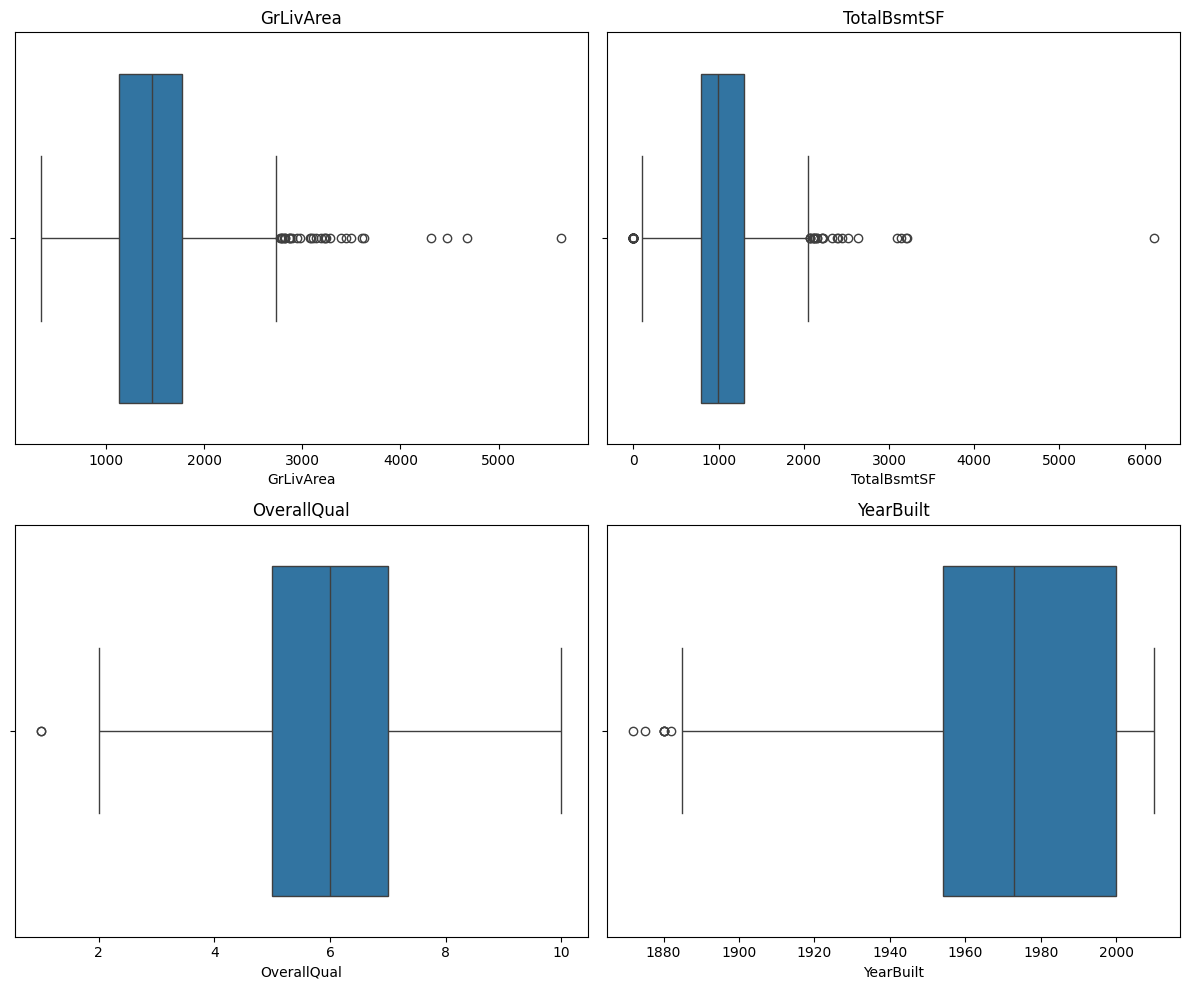

In [47]:
#Creating subplots for groups of features
features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, feature in enumerate(features):
    sns.boxplot(x=TrainDataset[feature], ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(feature)

plt.tight_layout()


In [14]:
fig = px.box(TrainDataset, x='Neighborhood', y='SalePrice')
fig.show()

# Feature Engineering:

**Checking for skewness:**

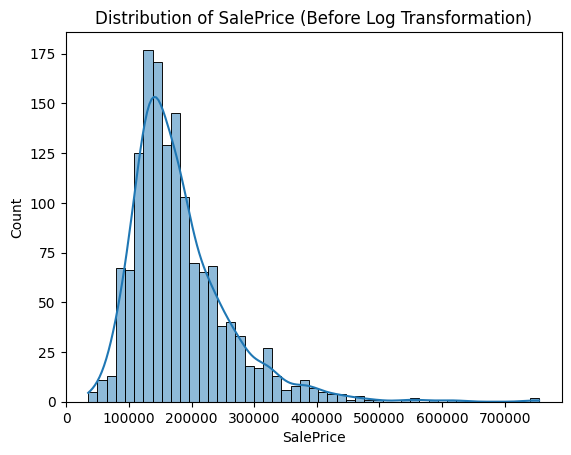

Skewness of SalePrice: 1.880940746034036


In [15]:
# Checking the distribution of SalePrice before transformation
sns.histplot(TrainDataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice (Before Log Transformation)')
plt.show()

# Checking skewness score
print("Skewness of SalePrice:", skew(TrainDataset['SalePrice']))

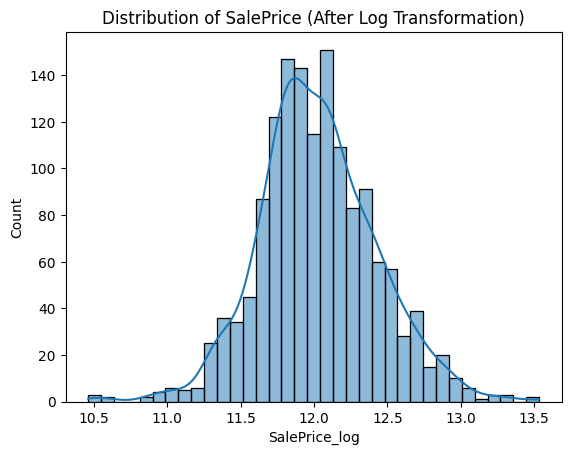

In [16]:
# Applying log transformation to the SalePrice column
TrainDataset['SalePrice_log'] = np.log1p(TrainDataset['SalePrice'])

# Visualizing the transformed SalePrice
sns.histplot(TrainDataset['SalePrice_log'], kde=True)
plt.title('Distribution of SalePrice (After Log Transformation)')
plt.show()

Top 5 Skewed Features:
 MiscVal         24.451640
PoolArea        14.813135
LotArea         12.195142
3SsnPorch       10.293752
LowQualFinSF     9.002080
dtype: float64


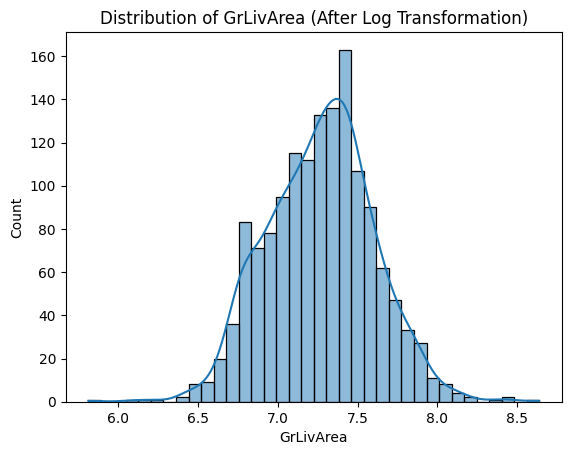

In [17]:
# Checking skewness for all numeric features
numeric_features = TrainDataset.select_dtypes(include=['int64', 'float64']).columns
skewed_features = TrainDataset[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("Top 5 Skewed Features:\n", skewed_features.head())

# Applying log1p to the top skewed features
skewed_columns = skewed_features[skewed_features > 0.75].index  # Features with skewness > 0.75
TrainDataset[skewed_columns] = np.log1p(TrainDataset[skewed_columns])

# Example: Checking one of the transformed features
sns.histplot(TrainDataset['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea (After Log Transformation)')
plt.show()

**Encoding Categorical Variables:**

In [18]:
#Checking columns that need to be converted to numeric:
non_numeric_columns = TrainDataset.select_dtypes(exclude=['number']).columns

if not non_numeric_columns.empty:
    print("Non-numeric columns:", list(non_numeric_columns))
else:
    print("All columns are numeric.")

Non-numeric columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
# Ordinal mapping for quality-related features
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}

lotshape_mapping = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
landcontour_mapping = {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1}
landslope_mapping = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
bsmt_fin_type_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
garage_finish_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}

# Apply the mapping to these columns
TrainDataset['ExterQual'] = TrainDataset['ExterQual'].map(quality_mapping)
TrainDataset['ExterCond'] = TrainDataset['ExterCond'].map(quality_mapping)
TrainDataset['BsmtQual'] = TrainDataset['BsmtQual'].map(quality_mapping)
TrainDataset['BsmtCond'] = TrainDataset['BsmtCond'].map(quality_mapping)
TrainDataset['HeatingQC'] = TrainDataset['HeatingQC'].map(quality_mapping)
TrainDataset['KitchenQual'] = TrainDataset['KitchenQual'].map(quality_mapping)
TrainDataset['FireplaceQu'] = TrainDataset['FireplaceQu'].map(quality_mapping)
TrainDataset['GarageQual'] = TrainDataset['GarageQual'].map(quality_mapping)
TrainDataset['GarageCond'] = TrainDataset['GarageCond'].map(quality_mapping)
TrainDataset['PoolQC'] = TrainDataset['PoolQC'].map(quality_mapping)
TrainDataset['LotShape'] = TrainDataset['LotShape'].map(lotshape_mapping)
TrainDataset['LandContour'] = TrainDataset['LandContour'].map(landcontour_mapping)
TrainDataset['LandSlope'] = TrainDataset['LandSlope'].map(landslope_mapping)
TrainDataset['BsmtExposure'] = TrainDataset['BsmtExposure'].map(bsmt_exposure_mapping)
TrainDataset['BsmtFinType1'] = TrainDataset['BsmtFinType1'].map(bsmt_fin_type_mapping)
TrainDataset['BsmtFinType2'] = TrainDataset['BsmtFinType2'].map(bsmt_fin_type_mapping)
TrainDataset['GarageFinish'] = TrainDataset['GarageFinish'].map(garage_finish_mapping)

In [20]:
# Binary encoding of centralair and street columns which have only two options
TrainDataset['CentralAir'] = TrainDataset['CentralAir'].map({'Y': 1, 'N': 0})
TrainDataset['Street'] = TrainDataset['Street'].map({'Pave': 1, 'Grvl': 0})
TrainDataset['PavedDrive'] = TrainDataset['PavedDrive'].map({'Y': 1, 'N': 0})

In [21]:
# Apply One-Hot Encoding to nominal features
nominal_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'SaleType', 'SaleCondition', 'LotConfig',
                    'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'Electrical', 'Functional', 'GarageType']

TrainDataset = pd.get_dummies(TrainDataset, columns=nominal_features, drop_first=True)


In [22]:
# Drop Utilities if it has low variance
if TrainDataset['Utilities'].nunique() == 1:
    TrainDataset = TrainDataset.drop(columns=['Utilities'])


In [23]:
# Handle missing categories by assigning 'None' or 0
TrainDataset['Alley'] = TrainDataset['Alley'].fillna('None')
TrainDataset['PoolQC'] = TrainDataset['PoolQC'].fillna('None')
TrainDataset['Fence'] = TrainDataset['Fence'].fillna('None')
TrainDataset['MiscFeature'] = TrainDataset['MiscFeature'].fillna('None')

# One-Hot Encoding for Alley, PoolQC, Fence, and MiscFeature
TrainDataset = pd.get_dummies(TrainDataset, columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], drop_first=True)


In [24]:
TrainDataset.head(100)

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,PoolQC_5.0,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,4.110874,4.189655,9.042040,1,4,4,AllPub,3,7,...,False,True,False,False,False,True,True,False,False,False
1,2,3.044522,4.394449,9.169623,1,4,4,AllPub,3,6,...,False,True,False,False,False,True,True,False,False,False
2,3,4.110874,4.234107,9.328212,1,3,4,AllPub,3,7,...,False,True,False,False,False,True,True,False,False,False
3,4,4.262680,4.110874,9.164401,1,3,4,AllPub,3,7,...,False,True,False,False,False,True,True,False,False,False
4,5,4.110874,4.442651,9.565284,1,3,4,AllPub,3,8,...,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.110874,4.262680,9.186662,1,2,4,AllPub,3,6,...,False,True,False,False,False,True,False,False,True,False
96,97,3.044522,4.369448,9.236495,1,3,4,AllPub,3,7,...,False,True,False,False,False,True,True,False,False,False
97,98,3.044522,4.304065,9.298534,1,4,2,AllPub,3,4,...,False,True,False,False,False,True,True,False,False,False
98,99,3.433987,4.454347,9.271059,1,4,4,AllPub,3,5,...,False,True,False,False,False,True,False,False,True,False


In [25]:
#Checking columns that need to be converted to numeric:
non_numeric_columns = TrainDataset.select_dtypes(exclude=['number']).columns

if not non_numeric_columns.empty:
    print("Non-numeric columns:", list(non_numeric_columns))
else:
    print("All columns are numeric.")

Non-numeric columns: ['Utilities', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',

In [26]:
# Check the data types of all columns to find categorical ones
print(TrainDataset.dtypes[TrainDataset.dtypes == 'object'])
# Apply one-hot encoding to the entire dataset
TrainDataset = pd.get_dummies(TrainDataset)

# Check the shape of the dataset after one-hot encoding
print(TrainDataset.shape)


Utilities    object
dtype: object
(1460, 212)


# Data Preprocessing:

**Feature Scaling:**

In [27]:
# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns
numeric_features = TrainDataset.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling to numeric columns
TrainDataset[numeric_features] = scaler.fit_transform(TrainDataset[numeric_features])

# Display scaled data
print(TrainDataset.head())


         Id  MSSubClass  LotFrontage   LotArea    Street  LotShape  \
0 -1.730865    0.424462    -0.086814 -0.133270  0.064238  0.701291   
1 -1.728492   -1.125202     0.564140  0.113413  0.064238  0.701291   
2 -1.726120    0.424462     0.054479  0.420049  0.064238 -1.016637   
3 -1.723747    0.645073    -0.337225  0.103317  0.064238 -1.016637   
4 -1.721374    0.424462     0.717354  0.878431  0.064238 -1.016637   

   LandContour  LandSlope  OverallQual  OverallCond  ...  Fence_GdWo  \
0     0.306146   0.225716     0.651479    -0.517200  ...       False   
1     0.306146   0.225716    -0.071836     2.179628  ...       False   
2     0.306146   0.225716     0.651479    -0.517200  ...       False   
3     0.306146   0.225716     0.651479    -0.517200  ...       False   
4     0.306146   0.225716     1.374795    -0.517200  ...       False   

   Fence_MnPrv  Fence_MnWw  Fence_None  MiscFeature_None  MiscFeature_Othr  \
0        False       False        True              True            

**Train-Test Split:**

In [28]:
# Separate features (X) and target (y)
X = TrainDataset.drop(columns=['SalePrice'])  # Assuming 'SalePrice' is the target variable
y = TrainDataset['SalePrice']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (1168, 211)
Testing set shape: (292, 211)


In [29]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()
print("Missing values in X_train:\n", missing_values[missing_values > 0])


Missing values in X_train:
 MasVnrArea        6
BsmtQual         28
BsmtCond         28
BsmtExposure     28
BsmtFinType1     28
BsmtFinType2     28
FireplaceQu     547
GarageYrBlt      64
GarageFinish     64
GarageQual       64
GarageCond       64
PavedDrive       25
dtype: int64


In [30]:
# Handle missing values in X_train
# Fill missing values for numeric columns with median
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    X_train[column].fillna(X_train[column].median(), inplace=True)
    X_test[column].fillna(X_test[column].median(), inplace=True)  # Do the same for X_test

# Fill missing values for categorical columns with mode
categorical_columns = X_train.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X_train[column].fillna(X_train[column].mode()[0], inplace=True)
    X_test[column].fillna(X_test[column].mode()[0], inplace=True)  # Do the same for X_test

# Check again to ensure no missing values remain
print("Missing values after imputation:\n", X_train.isnull().sum().sum())


Missing values after imputation:
 0


In [31]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [32]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)


In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Display evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 1.6058518662497562e-15
R² Score: 1.0


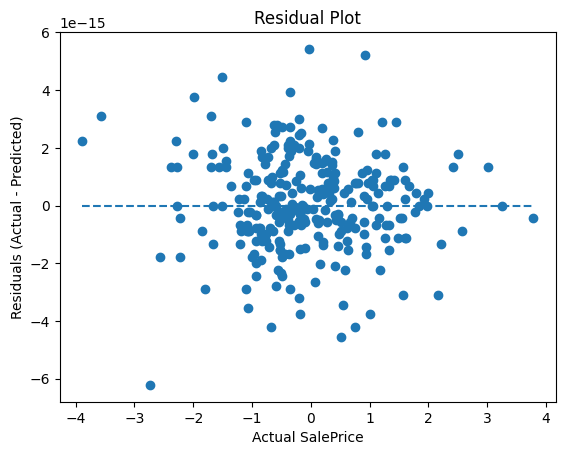

In [34]:
# Plot the residuals (actual - predicted)
plt.scatter(y_test, y_test - y_pred)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), linestyles='dashed')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


In [35]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Mean RMSE across all folds
print(f"Mean RMSE from cross-validation: {-np.mean(cv_scores)}")


Mean RMSE from cross-validation: 0.00014666044126231532


In [46]:
# Load your datasets
TrainDataset = pd.read_csv('train.csv')
TestDataset = pd.read_csv('test.csv')

# Log-transform the SalePrice for training
TrainDataset['SalePrice_log'] = np.log(TrainDataset['SalePrice'])

# Prepare target variable
y = TrainDataset['SalePrice_log']

# Drop columns not needed for training
X = TrainDataset.drop(columns=['Id', 'SalePrice', 'SalePrice_log'])

# Feature Engineering: Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing for numeric data: Impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models for ensemble
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.001)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Stacking ensemble model
base_models = [
    ('ridge', ridge_model),
    ('lasso', lasso_model),
    ('random_forest', random_forest_model),
    ('gradient_boosting', gbr_model)
]
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Combine preprocessor and models in pipelines
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', linear_model)])
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', ridge_model)])
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', lasso_model)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_model)])
gbr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', gbr_model)])
stacking_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', stacking_model)])

# Fit all models
linear_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
gbr_pipeline.fit(X_train, y_train)
stacking_pipeline.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_pipeline.predict(X_test)
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_gbr = gbr_pipeline.predict(X_test)
y_pred_stack = stacking_pipeline.predict(X_test)

# Calculate RMSE for all models
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
stack_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))

# Print RMSE values for comparison
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Lasso RMSE: {lasso_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gbr_rmse}")
print(f"Stacking RMSE: {stack_rmse}")

# Now generate predictions for the Kaggle Test dataset
TestDataset_preprocessed = TestDataset.drop(columns=['Id'])  # Drop 'Id' column for predictions

# Make predictions using the stacking model pipeline
kaggle_predictions_log = stacking_pipeline.predict(TestDataset_preprocessed)

# Reverse the log transformation of predictions using np.exp()
kaggle_predictions = np.exp(kaggle_predictions_log)

# Create the submission DataFrame
submission = pd.DataFrame({
    'Id': TestDataset['Id'],
    'SalePrice': kaggle_predictions
})

# Export the predictions to a CSV file
submission.to_csv('kaggle_submission.csv', index=False)

print("Submission file created: 'kaggle_submission.csv'")

Linear Regression RMSE: 0.1280955265341403
Ridge RMSE: 0.13161123640260775
Lasso RMSE: 0.13747268711259705
Random Forest RMSE: 0.14609501801629743
Gradient Boosting RMSE: 0.13741937538243745
Stacking RMSE: 0.12828040904336974
Submission file created: 'kaggle_submission.csv'
